# Sommaire :
 
 **<a href="#C1">IMPORTATION </a>**
  - <a href ="#C11"> Importation des libraries</a>
  - <a href ="#C12"> Chargement des données</a>
  
**<a href="#C2"> PREPARATION DE DONNEES </a>**
  - <a href ="#C21"> 2.1)  Division des données en ensembles d'entraînement et de test</a>
  -<a href ="#C22"> 2.2)  Création du caractère aléatoire et proportionnelle de la division </a>
  
**<a href="#C3"> MODELISATION </a>**
  - <a href ="#C31"> 3.1) Regression linéaire </a>
  - <a href ="#C32"> 3.2) Forêt Aléatoire </a>
  - <a href ="#C33"> 3.3) Gradient Boosting </a>
  - <a href ="#C34"> 3.4) MLP </a>
  - <a href ="#C35"> 3.5) XGBoost </a>

**<a href="#C4"> CHOIX DU MODELE </a>**
  - <a href="#C41"> 4.1) Tableau récapitulatif des score du modèle </a>
  - <a href="#C42"> 4.2) Modèle XGBoost avec la librairie LIME </a>
  
**<a href="#C5"> MODELISATION SANS "ENERGYSTARScore</a>**
  - <a href ="#C51"> 5.1) Regression linéaire </a>
  - <a href ="#C52"> 5.2) Forêt Aléatoire </a>
  - <a href ="#C53"> 5.3) Gradient Boosting </a>
  - <a href ="#C54"> 5.4) MLP </a>
  - <a href ="#C55"> 5.5) XGBoost </a>
  
**<a href="#C6"> CONCLUSION</a>**

# <a name="C1"> IMPORTATION </a>
## <a name="C11"> Importation des libraries</a>

In [1]:
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="C12"> Chargement des données</a>

In [2]:
data = pd.read_csv("ohe_Data")
data.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
0,7,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(1663, 62)

# <a name="C2"> PREPARATION DE DONNEES </a>
## <a name="C21"> 2.1) Division des données en ensembles d'entraînement et de test </a>

In [4]:
X = data.drop(columns= ["Target_Energies","Target_GES","GHGEmissionsIntensity"])
y = data['Target_Energies']

In [5]:
X.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
0,7,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

0    15.793246
1    15.942305
2    18.100297
3    15.731636
4    16.466822
Name: Target_Energies, dtype: float64

## <a name="C22"> 2.2) Création du caractère aléatoire et proportionnelle de la division </a>

In [7]:
# importer train_test_split
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42, shuffle=True)

X_train.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
1563,3,20,0.0,3,10.730794,0.000000,10.730794,88.0,4.765587,5.775483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,2,55,1.0,1,10.631712,0.000000,10.631712,90.0,3.523415,4.231204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
243,7,36,1.0,4,11.602282,10.563595,11.165451,47.5,4.756173,5.839478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,4,70,1.0,1,10.098026,0.000000,10.098026,53.0,2.186051,3.328627,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
312,7,20,2.0,5,12.270375,11.654668,11.493284,83.0,3.981549,5.126342,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_test.head()

1448    14.154191
168     19.495993
220     17.538779
1643    14.889072
344     16.768602
Name: Target_Energies, dtype: float64

# <a name="C3"> MODELISATION </a>

In [10]:
from sklearn import model_selection

# Créer un modèle avec recherche d'hyperparamètre par validation croisée
from sklearn.model_selection import GridSearchCV

# calculer les scores R² et 
from sklearn.metrics import mean_squared_error, r2_score

## <a name="C31"> 3.1) Regression linéaire </a>

###  a.) Création du modèle
#### Le modèle

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# initialisation du modèle
model = LinearRegression()

# Fixer les valeurs des hyperparamètres à tester
parameters = {'normalize': [True, False]}

In [13]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
lr = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring = 'r2')

In [14]:
# Optimiser sur le jeu d'entraînement
lr.fit(X_train, y_train)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, scoring='r2')

In [15]:
# résultats de la validation croisée
res = lr.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010739,0.014944,0.009377,0.007833,True,{'normalize': True},0.783062,-3.398844e+22,-1.153372e+23,-4.981058e+22,0.141806,-3.982723e+22,4.244508e+22,2
1,0.004550,0.006187,0.004898,0.006367,False,{'normalize': False},0.783201,7.265246e-01,7.699241e-01,8.529433e-01,0.141366,6.547918e-01,2.599078e-01,1


In [16]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(lr.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'normalize': False}


In [17]:
lr_r2 = lr.best_score_
print("Best score: ", lr.best_score_)

Best score:  0.6547917914008282


#### Prédiction

In [18]:
y_test_pred = lr.predict(X_test)

### b.) Evaluation du modèle

In [19]:
# la racine de l'erreur quadratique moyenne
rmse = mean_squared_error(y_test, y_test_pred)
# l'erreur quadratique moyenne
mse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Le score R²
r2 = r2_score(y_test, y_test_pred)
# l'erreur carré relative
rse = 1-r2

print("Racine de l'erreur quadratique moyenne : ", rmse)

print('----'*20)
print("Erreur quadratique moyenne : ", mse)
print("Erreur carré relative : ", rse)
print('Score R² : ', r2)

Racine de l'erreur quadratique moyenne :  0.674338962194682
--------------------------------------------------------------------------------
Erreur quadratique moyenne :  0.821181442919092
Erreur carré relative :  0.17840305334663542
Score R² :  0.8215969466533646


#### Les scores

In [20]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_lr  = pd.DataFrame(scores, index = ['Régression Linéaire'])
df_lr

,mse,rse,R²
Régression Linéaire,0.821181,0.178403,0.821597


### c.) Features importances

In [21]:
# Obtenir les importances de caractéristiques
feat_imp = lr.best_estimator_.coef_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [22]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
8,SiteEUI(kBtu/sf),0.960515
33,PrimaryPropertyType_15,0.763473
24,PrimaryPropertyType_6,0.753359


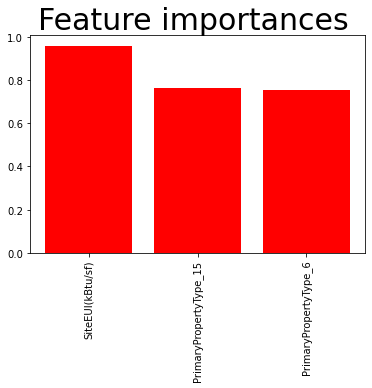

In [23]:
# le graphique à barres à partir de coefficients : 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color= 'red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C32"> 3.2) Forêt Aléatoire </a>

###  a.) Création du modèle
#### modèle

In [24]:
from sklearn.ensemble import RandomForestRegressor as model_class

In [25]:
# initialisation du modèle
rf = model_class(random_state=42)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4,5],
}

In [26]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
rfr = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, scoring = ['r2', 'neg_mean_squared_error'],refit='r2')

In [27]:
# Optimiser sur le jeu d'entraînement
rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [28]:
# résultats de la validation croisée
res = rfr.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,split2_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
0,0.312274,0.011698,0.019275,0.006298,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.531376,0.695649,0.434755,...,0.157118,22,-1.799607,-2.040852,-1.418875,-1.756659,-1.887471,-1.780693,0.205393,22
1,0.450739,0.013813,0.028237,0.006303,1,150,"{'max_depth': 1, 'n_estimators': 150}",0.537469,0.696716,0.437400,...,0.146403,21,-1.776210,-2.033700,-1.412236,-1.746062,-1.793950,-1.752432,0.198582,21
2,0.552735,0.065665,0.026307,0.006405,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.530822,0.695930,0.432446,...,0.161332,23,-1.801737,-2.038966,-1.424672,-1.758060,-1.920290,-1.788745,0.206676,23
3,0.641279,0.097178,0.038063,0.007438,1,250,"{'max_depth': 1, 'n_estimators': 250}",0.533135,0.693468,0.426540,...,0.168516,24,-1.792854,-2.055478,-1.439497,-1.773312,-1.976810,-1.807590,0.213058,24
4,0.915420,0.021553,0.044120,0.006335,1,300,"{'max_depth': 1, 'n_estimators': 300}",0.532418,0.692639,0.425164,...,0.170436,25,-1.795607,-2.061039,-1.442950,-1.770936,-1.994401,-1.812987,0.216073,25
5,0.477848,0.087692,0.018826,0.006215,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.761753,0.917258,0.764751,...,0.143510,16,-0.914914,-0.554836,-0.590521,-0.655412,-1.266361,-0.796409,0.266655,16
6,0.631735,0.047950,0.025428,0.007164,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.759405,0.917840,0.767232,...,0.147956,17,-0.923931,-0.550931,-0.584294,-0.649701,-1.293975,-0.800566,0.279472,17
7,0.642240,0.101253,0.024017,0.006973,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.757236,0.917498,0.765511,...,0.160270,18,-0.932261,-0.553223,-0.588613,-0.655079,-1.376719,-0.821179,0.308039,18
8,1.021791,0.016301,0.040093,0.006794,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.754950,0.917029,0.765024,...,0.163137,19,-0.941040,-0.556370,-0.589837,-0.658259,-1.397148,-0.828531,0.314968,19
9,1.216304,0.012721,0.051256,0.006399,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.755018,0.916988,0.764751,...,0.164921,20,-0.940781,-0.556643,-0.590520,-0.659381,-1.408997,-0.831264,0.318963,20


In [29]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rfr.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 5, 'n_estimators': 100}


In [30]:
rfr_r2 = rfr.best_score_
print("Best score: ", rfr.best_score_)

Best score:  0.8987708766963216


In [31]:
y_train_pred = rfr.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

Score du training set :  0.9713497275838447


#### Prédiction

In [32]:
y_test_pred = rfr.predict(X_test)

### b.) Evaluation du modèle

In [33]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

#### Les scores

In [34]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_rfr  = pd.DataFrame(scores, index = ['Forêt Aléatoire'])
df_rfr

,mse,rse,R²
Forêt Aléatoire,0.171782,0.045447,0.954553


### c.) Features importances

In [35]:
# Obtenir les importances de caractéristiques
feat_imp = rfr.best_estimator_.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [36]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
11,Electricity(kBtu),0.403683
8,SiteEUI(kBtu/sf),0.369183
9,SourceEUI(kBtu/sf),0.189757


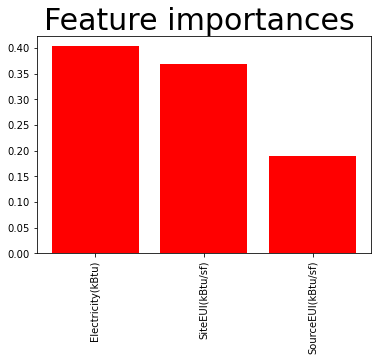

In [37]:
# le graphique à barres à partir de coefficients : 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color= 'red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C33"> 3.3) Gradient Boosting </a>

###  a.) Création du modèle
#### modèle

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
# initialisation du modèle
gb =  GradientBoostingRegressor(random_state=42)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1,2,3,4,5],
}

In [40]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
gbr = GridSearchCV(estimator=gb, param_grid = param_grid, cv=5, n_jobs=-1, verbose=1, scoring = 'r2')

In [41]:
# Optimiser sur le jeu d'entraînement
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='r2', verbose=1)

In [42]:
# résultats de la validation croisée
res = gbr.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.306824,0.025765,0.006230,0.006567,0.05,1,100,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.856888,0.917156,0.913416,0.900562,0.652520,0.848108,0.100116,75
1,0.429114,0.012082,0.000902,0.001804,0.05,1,150,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.868201,0.953493,0.950860,0.944876,0.651654,0.873817,0.115517,74
2,0.536401,0.011774,0.009373,0.007653,0.05,1,200,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.868480,0.968694,0.964632,0.962459,0.643202,0.881493,0.124919,72
3,0.680757,0.007721,0.006350,0.007779,0.05,1,250,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.866075,0.975121,0.970569,0.967421,0.636987,0.883235,0.129684,70
4,0.929690,0.088425,0.009054,0.007416,0.05,1,300,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.863423,0.979105,0.973695,0.971123,0.631228,0.883715,0.133415,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.396734,0.034039,0.012498,0.006249,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.911161,0.991439,0.995150,0.994325,0.637483,0.905911,0.137969,59
71,2.079148,0.042082,0.012578,0.007449,0.2,5,150,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.911236,0.991486,0.995207,0.994342,0.637211,0.905896,0.138091,60
72,2.847909,0.129181,0.002403,0.004806,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.911322,0.991486,0.995203,0.994355,0.637249,0.905923,0.138077,58
73,3.475101,0.068625,0.006128,0.007508,0.2,5,250,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.911348,0.991485,0.995216,0.994365,0.637330,0.905949,0.138049,56


In [43]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(gbr.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [44]:
gbr_r2 = gbr.best_score_
print("Best score: ", gbr.best_score_)

Best score:  0.9418800482477586


In [45]:
y_train_pred = gbr.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

Score du training set :  0.9990737214643192


#### Prédiction

In [46]:
y_test_pred = gbr.predict(X_test)

### b.) Evaluation du modèle

In [47]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

#### Les scores

In [48]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_gr  = pd.DataFrame(scores, index = ['Gradient Boosting'])
df_gr

,mse,rse,R²
Gradient Boosting,0.07786,0.020599,0.979401


### c.) Features importances

In [49]:
# Obtenir les importances de caractéristiques
feat_imp = gbr.best_estimator_.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [50]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
8,SiteEUI(kBtu/sf),0.542601
11,Electricity(kBtu),0.359406
12,NaturalGas(kBtu),0.040455


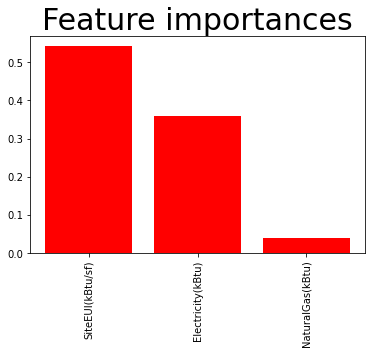

In [51]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C34"> 3.4) MLP </a>

###  a.) Création du modèle
#### modèle

In [52]:
from sklearn.neural_network import MLPRegressor

In [53]:
rp = MLPRegressor()

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (100,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'adam', 'sgd']
}

In [54]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
mlp = GridSearchCV(estimator=rp, param_grid = param_grid, cv=5, scoring = 'r2')

In [55]:
# Optimiser sur le jeu d'entraînement
mlp.fit(X_train, y_train)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (20,), (30,), (50,),
                                                (100,)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             scoring='r2')

In [56]:
# résultats de la validation croisée
res = mlp.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.325738,0.010685,0.009383,0.007661,relu,"(10,)",lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.786233,0.722939,0.778956,0.848990,7.145431e-01,0.770332,0.048729,3
1,0.960306,0.047907,0.004473,0.006156,relu,"(10,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.719203,0.683744,0.742275,0.756102,5.690507e-01,0.694075,0.067141,10
2,0.527482,0.045188,0.003729,0.006065,relu,"(10,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000751,-0.005921,-0.002025,-0.031815,-1.937841e-05,-0.008106,0.012028,40
3,0.417315,0.057224,0.006248,0.007652,relu,"(20,)",lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.851892,0.737156,0.765081,0.766760,6.361040e-01,0.751398,0.069308,7
4,1.058794,0.077090,0.001298,0.002595,relu,"(20,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.565666,0.658956,0.734243,0.794446,6.614271e-01,0.682948,0.077275,12
5,0.589339,0.096416,0.005236,0.006618,relu,"(20,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000917,-0.006062,-0.001800,0.731900,-7.924098e-07,0.144624,0.293645,32
6,0.621597,0.024535,0.003003,0.006007,relu,"(30,)",lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.789059,0.746986,0.797666,0.843849,6.065841e-01,0.756829,0.081178,5
7,1.171057,0.158624,0.003203,0.006406,relu,"(30,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.802977,0.837741,0.727192,0.695855,6.825114e-01,0.749255,0.060842,8
8,0.580582,0.038565,0.000000,0.000000,relu,"(30,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000748,-0.005617,-0.001392,-0.035879,-7.414334e-06,-0.008729,0.013714,41
9,0.799867,0.100239,0.008853,0.008123,relu,"(50,)",lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.789201,0.809267,0.764364,0.808892,7.414004e-01,0.782625,0.026366,2


In [57]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(mlp.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [58]:
mlp_r2 = mlp.best_score_
print("Best score: ", mlp.best_score_)

Best score:  0.8423216935001617


In [59]:
y_train_pred = mlp.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

Score du training set :  0.9501799859785902


#### Prédiction

In [60]:
y_test_pred = mlp.predict(X_test)

### b.) Evaluation du modèle

In [61]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

#### Les scores

In [62]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_mlp  = pd.DataFrame(scores, index = ['MLP'])
df_mlp

,mse,rse,R²
MLP,0.329699,0.087225,0.912775


### c.) Features importances

In [63]:
# Extraire le meilleur estimator de GridSearchCV object
best_mlp = mlp.best_estimator_

# Calculate feature importances
coefs = np.abs(best_mlp.coefs_[0])
feature_importances = np.sum(coefs, axis=1)

In [64]:
# Obtenir les importances de caractéristiques
feat_imp = feature_importances


importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [65]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
17,BuildingType_4,14.929261
21,PrimaryPropertyType_3,13.731531
47,Neighborhood_7,12.972097


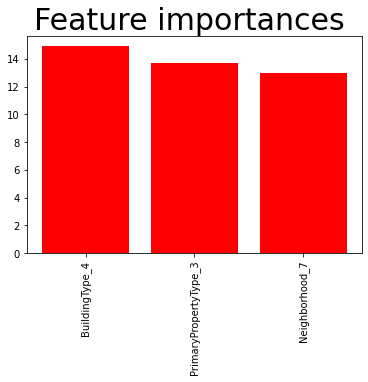

In [66]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

## <a name="C35"> 3.5) XGBoost </a>
#### Installation de XGBoost

In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


###  a.) Création du modèle
#### modèle

In [68]:
import xgboost as xgb

In [69]:
# initialisation du modèle
rp = xgb.XGBRegressor(random_state=42)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1,2,3,4,5],
}

In [70]:
# Créer un modèle avec recherche d'hyperparamètre par validation croisée
gb = GridSearchCV(estimator=rp, param_grid = param_grid, cv=5, scoring = 'r2')

In [71]:
# Optimiser sur le jeu d'entraînement
gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [72]:
# résultats de la validation croisée
res = gb.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195925,0.017543,0.014618,0.002670,0.05,1,100,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.851122,0.913402,0.909631,0.890400,0.680382,0.848987,0.087149,75
1,0.315552,0.018087,0.025559,0.005535,0.05,1,150,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.867228,0.950604,0.950211,0.942894,0.682023,0.878592,0.103168,74
2,0.431506,0.017306,0.018027,0.003089,0.05,1,200,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.868872,0.967311,0.963631,0.960808,0.676918,0.887508,0.111563,73
3,0.529332,0.016969,0.013851,0.003544,0.05,1,250,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.867207,0.974646,0.969912,0.966753,0.671245,0.889953,0.116460,72
4,0.633455,0.016094,0.016906,0.002371,0.05,1,300,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.864680,0.978496,0.973332,0.970252,0.665259,0.890404,0.120304,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.370124,0.007878,0.028280,0.006331,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.891584,0.994634,0.994302,0.990928,0.719168,0.918123,0.107000,45
71,0.538772,0.025213,0.025177,0.005854,0.2,5,150,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.891886,0.994779,0.994469,0.991085,0.718939,0.918232,0.107136,44
72,0.687539,0.026493,0.014962,0.001733,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.892039,0.994773,0.994496,0.991121,0.719060,0.918298,0.107092,43
73,0.898691,0.048541,0.021913,0.007549,0.2,5,250,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.891993,0.994786,0.994504,0.991148,0.719175,0.918321,0.107058,42


In [73]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(gb.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


In [74]:
gb_r2 = gb.best_score_
print("Best score: ", gb.best_score_)

Best score:  0.9368815931513573


In [75]:
y_train_pred = gb.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print("Score du training set : ", r2)

Score du training set :  0.99980840204639


#### Prédiction

In [76]:
y_test_pred = gb.predict(X_test)

### b.) Evaluation du modèle

In [77]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

### Les scores

In [78]:
scores = {
    'mse':mse,
    'rse' :rse,
    'R²' : r2
}
df_gb  = pd.DataFrame(scores, index = ['XGBoost'])
df_gb

,mse,rse,R²
XGBoost,0.050173,0.013274,0.986726


### c.) Features importances

In [79]:
# Obtenir les importances de caractéristiques
feat_imp = gb.best_estimator_.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':feat_imp
})
# Trier la dataframe obtenué
importances = importances.sort_values(by='Importance', ascending=False)

In [80]:
importances = importances.iloc[:3]
importances

,Attribute,Importance
8,SiteEUI(kBtu/sf),0.653964
11,Electricity(kBtu),0.171460
12,NaturalGas(kBtu),0.033160


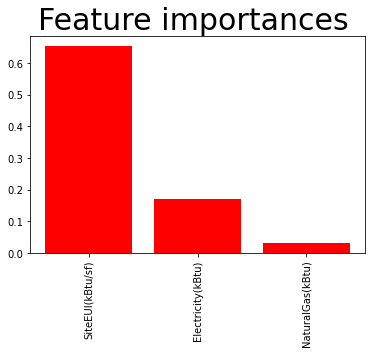

In [81]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances ', size=30)
plt.xticks(rotation='vertical')
plt.show()

# <a name="C4"> CHOIX DU MODELE </a>
## <a name="C41"> 4.1) Tableau récapitulatif des scores du modèle </a>

#### best scores issus du GridSearchcv

In [82]:
scores = {
    'linear reg':lr_r2,
    'RandomForest':rfr_r2,
    'grd boosting' : gbr_r2,
    'mlp' : mlp_r2,
    'XGB' :gb_r2
}
R2  = pd.DataFrame(scores, index = ['R²'])
R2

,linear reg,RandomForest,grd boosting,mlp,XGB
R²,0.654792,0.898771,0.94188,0.842322,0.936882


Comme, nous pouvons le constater dans le tableau le modèle présentant le meilleur score est celui de : **Gradiant Boosting**

#### Tableau compilatif des scores du testing set 

In [83]:
DF1 = pd.concat([df_lr,df_gr,df_rfr,df_mlp,df_gb])
DF1

,mse,rse,R²
Régression Linéaire,0.821181,0.178403,0.821597
Gradient Boosting,0.077860,0.020599,0.979401
Forêt Aléatoire,0.171782,0.045447,0.954553
MLP,0.329699,0.087225,0.912775
XGBoost,0.050173,0.013274,0.986726


## <a name="C42"> 4.2) Modèle Gradiant Boosting avec la librairie LIME </a> 

#### Installation de la librairie LIME

In [84]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


#### Feature importance 

In [85]:
import random
import lime
import lime.lime_tabular

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Instance 0:
True value: 14.154190890660312
Predicted value: 14.23756749332124
Explanation: 
[('SiteEUI(kBtu/sf) <= 3.48', -0.7611105194815003), ('13.43 < Electricity(kBtu) <= 14.27', -0.6384547284112523), ('SourceEUI(kBtu/sf) <= 4.31', 0.31276738082161826), ('SteamUse(kBtu) <= 0.00', -0.28887938611685576), ('0.00 < NaturalGas(kBtu) <= 13.11', -0.26380769412571203)]


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


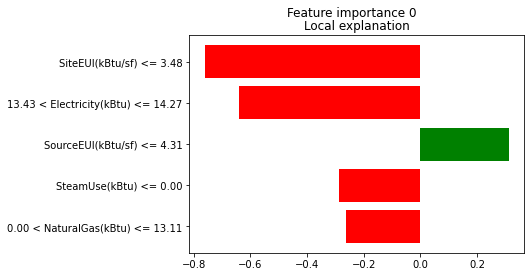

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Instance 1:
True value: 19.495992961993323
Predicted value: 19.52327601396316
Explanation: 
[('Electricity(kBtu) > 15.29', 1.882900990921605), ('NaturalGas(kBtu) > 14.18', 0.7020600383343478), ('SiteEUI(kBtu/sf) > 4.39', 0.5091913301158588), ('SteamUse(kBtu) > 0.00', 0.3748958890312221), ('PropertyGFABuilding(s) > 11.41', 0.16207157245794387)]


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


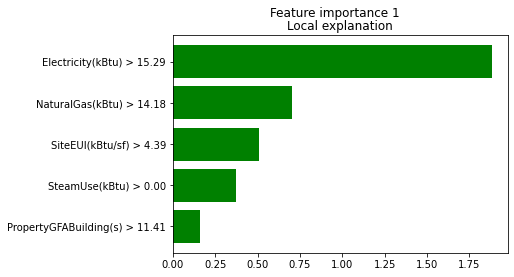

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Instance 2:
True value: 17.538779458047447
Predicted value: 17.506272452171572
Explanation: 
[('Electricity(kBtu) > 15.29', 1.888209420926598), ('NaturalGas(kBtu) > 14.18', 0.684791333266834), ('SiteEUI(kBtu/sf) > 4.39', 0.47339006300144637), ('SteamUse(kBtu) <= 0.00', -0.3380970968011008), ('PropertyGFABuilding(s) > 11.41', 0.15035378610313244)]


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


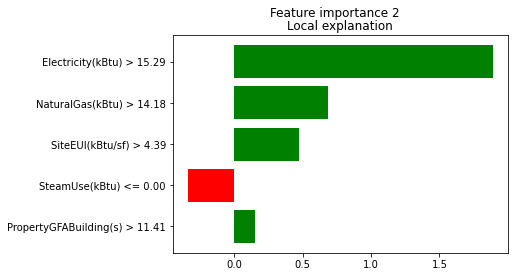

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Instance 3:
True value: 14.889071669765524
Predicted value: 14.751056921750434
Explanation: 
[('PrimaryPropertyType_19 <= 0.00', -0.2875932912793371), ('Neighborhood_2 <= 0.00', -0.23190921697050218), ('SteamUse(kBtu) <= 0.00', -0.21663057024612986), ('PrimaryPropertyType_10 > 0.00', 0.10589272945359023), ('14.27 < Electricity(kBtu) <= 15.29', 0.08369937846577301)]


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


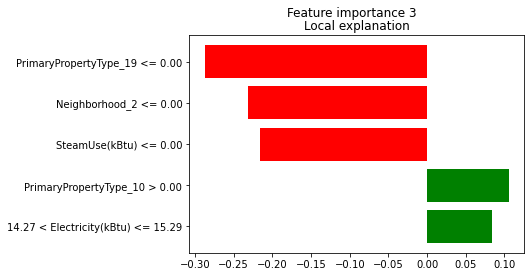

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Instance 4:
True value: 16.76860230947871
Predicted value: 16.828830532404446
Explanation: 
[('Electricity(kBtu) > 15.29', 1.8994962796998522), ('NaturalGas(kBtu) > 14.18', 0.7079220458499831), ('SiteEUI(kBtu/sf) > 4.39', 0.4868721597385047), ('SteamUse(kBtu) <= 0.00', -0.3051505920794239), ('PropertyGFABuilding(s) > 11.41', 0.16705934801465594)]


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


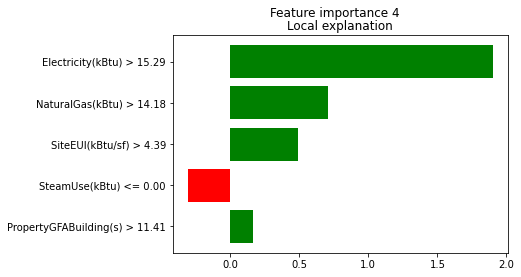

In [86]:
# Création d'un explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns.values, discretize_continuous=True, mode='regression')

# Calcul de l'importance des fonctionnalités pour les instances de test
for i in range(5):
    exp = explainer.explain_instance(X_test.values[i], gbr.predict, num_features=5)
    print('Instance {}:'.format(i))
    print('True value: {}'.format(y_test.values[i]))
    print('Predicted value: {}'.format(gbr.predict(X_test.values[i].reshape(1, -1))[0]))
    print('Explanation: \n{}'.format(exp.as_list()))
# Visualisation de l'importance des fonctionnalités
    fig = exp.as_pyplot_figure()
    fig.suptitle('Feature importance {}'.format(i))
    plt.show()


# <a name="C5"> MODELISATION SANS "ENERGYSTARScore"</a>

#### Préparation des données

In [87]:
X = data.drop(columns= ["Target_Energies","Target_GES","ENERGYSTARScore","GHGEmissionsIntensity"])
y = data['Target_Energies']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=5, shuffle=True)

X_train.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
405,1,27,1.0,2,11.492968,0.0,11.492968,3.015535,3.927896,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1144,2,56,1.0,1,10.090340,0.0,10.090340,5.282696,6.426974,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,4,43,1.0,1,10.101395,0.0,10.101395,6.001662,6.816517,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1105,1,99,1.0,1,10.800922,0.0,10.800922,4.360548,4.654912,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
573,2,56,1.0,1,11.202261,0.0,11.202261,3.411148,4.123903,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
y_test.head()

258     15.293267
626     14.477483
1545    13.093904
1146    13.546447
722     13.442477
Name: Target_Energies, dtype: float64

## <a name="C51"> 5.1) Regression linéaire </a>


###  a.) Création du modèle

In [90]:
parameters = {'normalize': False}
# initialisation du modèle
lr = LinearRegression()
# Adapter les données (entraînement du modèle)
lr.fit(X_train, y_train)
# Prédiction
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

### b.) Evaluation du modèle

####  Evaluation du training set

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_train, y_train_pred)
mse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_lr_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [92]:
# l'erreur quadratique moyenne
mse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Le score R²
r2 = r2_score(y_test, y_test_pred)
# l'erreur carré relative
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_lr  = pd.DataFrame(scores, index = ['Régression Linéaire'])

In [93]:
df = pd.concat([df_lr_train,df_lr])
print("REGRESSION LINEAIRE :")
df

REGRESSION LINEAIRE :


,mse,rse,R²
Training set,0.808755,0.013274,0.823312
Régression Linéaire,0.923167,0.226547,0.773453


## <a name="C52"> 5.2) Forêt Aléatoire </a>

###  a.) Création du modèle

In [94]:
# initialisation du modèle
rfr = model_class(random_state=42, max_depth= 5, n_estimators= 100)
# Adapter les données (entraînement du modèle)
rfr.fit(X_train, y_train)
# Prédiction
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [95]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_rfr_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [96]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_rfr = pd.DataFrame(scores, index = ['Forêt Aléatoire'])

In [97]:
df = pd.concat([df_rfr_train,df_rfr])
print("FORÊT ALEATOIRE :")
df

FORÊT ALEATOIRE :


,mse,rse,R²
Training set,0.067119,0.018131,0.981869
Forêt Aléatoire,0.091941,0.024440,0.975560


## <a name="C53"> 5.3) Gradient Boosting  </a>
###  a.) Création du modèle

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters for GradientBoostingRegressor
gbr_params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

gbr = GradientBoostingRegressor(**gbr_params,random_state=0)
gbr.fit(X_train, y_train)
# Prédiction
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [99]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_grb_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [100]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_grb = pd.DataFrame(scores, index = ['Gradient Boosting'])

In [101]:
df = pd.concat([df_grb_train,df_grb])
print("GRADIENT BOOSTING  :")
df

GRADIENT BOOSTING  :


,mse,rse,R²
Training set,0.003053,0.000825,0.999175
Gradient Boosting,0.076920,0.020447,0.979553


## <a name="C54"> 5.4) MLP </a>
###  a.) Création du modèle

In [102]:
mlp = MLPRegressor(activation = 'relu', hidden_layer_sizes= (30,), solver ='lbfgs')
mlp.fit(X_train, y_train)
# Prédiction
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### b.) Evaluation du modèle
####  Evaluation du training set

In [103]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_mlp_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [104]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_mlp = pd.DataFrame(scores, index = ['MLP'])

In [105]:
df = pd.concat([df_mlp_train, df_mlp])
print("MLP :")
df

MLP :


,mse,rse,R²
Training set,0.60889,0.164480,0.835520
MLP,0.94424,0.251003,0.748997


## <a name="C55"> 5.5) XGBoost </a>
###  a.) Création du modèle

In [106]:
gb = xgb.XGBRegressor(learning_rate= 0.2, max_depth=3, n_estimators= 300) 
gb.fit(X_train, y_train)
# Prédiction
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

### b.) Evaluation du modèle
####  Evaluation du training set

In [107]:
r2 = r2_score(y_train,y_train_pred )
mse = mean_squared_error(y_train, y_train_pred )
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_gb_train  = pd.DataFrame(scores, index = ['Training set'])

####  Evaluation du testing set

In [108]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rse = 1-r2

scores = {'mse':mse,'rse' :rse,'R²' : r2}
df_gb = pd.DataFrame(scores, index = ['XGBoost'])

In [109]:
df = pd.concat([df_gb_train, df_gb])
print("XGBOOST :")
df

XGBOOST :


,mse,rse,R²
Training set,0.000797,0.000215,0.999785
XGBoost,0.022047,0.005861,0.994139


## Tableau récapitulatif des scores

In [110]:
DF2 = pd.concat([df_lr,df_grb,df_rfr,df_mlp,df_gb])
DF2

,mse,rse,R²
Régression Linéaire,0.923167,0.226547,0.773453
Gradient Boosting,0.076920,0.020447,0.979553
Forêt Aléatoire,0.091941,0.024440,0.975560
MLP,0.944240,0.251003,0.748997
XGBoost,0.022047,0.005861,0.994139


In [111]:
DF2 = DF2.drop(columns=["mse","rse"])
DF2 = DF2.transpose()

DF1 = DF1.drop(columns=["mse","rse"])
DF1 = DF1.transpose()

DF = pd.concat([DF1,DF2])
DF.index = ["R²(avec ENERGYSTARScore)","R²(Sans ENERGYSTARScore)"]
DF

,Régression Linéaire,Gradient Boosting,Forêt Aléatoire,MLP,XGBoost
R²(avec ENERGYSTARScore),0.821597,0.979401,0.954553,0.912775,0.986726
R²(Sans ENERGYSTARScore),0.773453,0.979553,0.975560,0.748997,0.994139


Nous ne constatons pas de changement notable du R².

# <a name="C6"> CONCLUSION </a>

Le meilleur modèle pour la prédiction de la consommation de l'énergie est l'algorithme Gradiant Boosting.

La suppression de la variable "ENERGYSTARScore" n'a pas d'impact majeur sur notre modèle.

Les variables ayant le plus d'importance dans la prédiction de lénergie sont : 

   - **SiteEUI(kBtu/sf) (54%)**
 
   - **Electricity(kBtu) (36%)**